# <center>Haircut Tip Amounts Analysis</center>

### Accessing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from sklearn import datasets, svm, tree, preprocessing, metrics
import warnings
warnings.simplefilter("ignore")

In [2]:
tipAmounts = pd.read_excel('./data/Haircut Tip Amounts.xlsx', skiprows=2)

In [3]:
tipAmounts

,Tip amount,Time,Day,Culture,Married,Age,Unnamed: 6,Unnamed: 7,Culture Codes,Unnamed: 9
0,0,5.0,Fri,I,NM,30.0,NaN,NaN,I,Indian
1,1,2.0,Tue,E,NM,10.0,NaN,NaN,E,European
2,1,7.0,Tues,I,NM,35.0,NaN,NaN,B,African American
3,2,5.0,Mon,I,NM,35.0,NaN,NaN,W,American
4,2,12.0,Fri,M,NM,15.0,NaN,NaN,P,Phillipino
...,...,...,...,...,...,...,...,...,...,...
229,10,1.0,Sat,W,M,40.0,NaN,NaN,NaN,NaN
230,1,13.0,Sat,I,NM,10.0,NaN,NaN,NaN,NaN
231,5,14.0,Sat,W,M,36.0,NaN,NaN,NaN,NaN
232,3,15.0,Sat,W,NM,8.0,NaN,NaN,NaN,NaN


### Cleaning the dataset.

In [4]:
# Drop row 6-7 without data.
tipAmounts = tipAmounts.drop(tipAmounts.columns[[6,7]], axis=1)

In [5]:
# Replace letters with actual names of the culture.
tipAmounts['Culture'] = tipAmounts['Culture'].replace(to_replace='E', value='European', regex=True)
tipAmounts['Culture'] = tipAmounts['Culture'].replace(to_replace='I', value='Indian', regex=True)
tipAmounts['Culture'] = tipAmounts['Culture'].replace(to_replace='B', value='African American', regex=True)
tipAmounts['Culture'] = tipAmounts['Culture'].replace(to_replace='W', value='American', regex=True)
tipAmounts['Culture'] = tipAmounts['Culture'].replace(to_replace='P', value='Phillipino', regex=True)

In [6]:
tipAmounts

,Tip amount,Time,Day,Culture,Married,Age,Culture Codes,Unnamed: 9
0,0,5.0,Fri,Indian,NM,30.0,I,Indian
1,1,2.0,Tue,European,NM,10.0,E,European
2,1,7.0,Tues,Indian,NM,35.0,B,African American
3,2,5.0,Mon,Indian,NM,35.0,W,American
4,2,12.0,Fri,M,NM,15.0,P,Phillipino
...,...,...,...,...,...,...,...,...
229,10,1.0,Sat,American,M,40.0,NaN,NaN
230,1,13.0,Sat,Indian,NM,10.0,NaN,NaN
231,5,14.0,Sat,American,M,36.0,NaN,NaN
232,3,15.0,Sat,American,NM,8.0,NaN,NaN


In [7]:
# Remove the 'Culture Codes' column and the last one.
tipAmounts = tipAmounts.drop(tipAmounts.columns[[6,7]], axis=1)

In [8]:
tipAmounts

,Tip amount,Time,Day,Culture,Married,Age
0,0,5.0,Fri,Indian,NM,30.0
1,1,2.0,Tue,European,NM,10.0
2,1,7.0,Tues,Indian,NM,35.0
3,2,5.0,Mon,Indian,NM,35.0
4,2,12.0,Fri,M,NM,15.0
...,...,...,...,...,...,...
229,10,1.0,Sat,American,M,40.0
230,1,13.0,Sat,Indian,NM,10.0
231,5,14.0,Sat,American,M,36.0
232,3,15.0,Sat,American,NM,8.0


In [9]:
# Replace values in 'Married' column to True/False.
tipAmounts['Married'] = tipAmounts['Married'].replace(to_replace='NM', value=False, regex=True)
tipAmounts['Married'] = tipAmounts['Married'].replace(to_replace='M', value=True, regex=True)

In [10]:
tipAmounts

,Tip amount,Time,Day,Culture,Married,Age
0,0,5.0,Fri,Indian,False,30.0
1,1,2.0,Tue,European,False,10.0
2,1,7.0,Tues,Indian,False,35.0
3,2,5.0,Mon,Indian,False,35.0
4,2,12.0,Fri,M,False,15.0
...,...,...,...,...,...,...
229,10,1.0,Sat,American,True,40.0
230,1,13.0,Sat,Indian,False,10.0
231,5,14.0,Sat,American,True,36.0
232,3,15.0,Sat,American,False,8.0


In [11]:
# Check for rows without data.
tipAmounts[tipAmounts.isnull().any(axis=1)]

,Tip amount,Time,Day,Culture,Married,Age
114,NaN,NaN,NaN,NaN,NaN,NaN
115,THE DATA BELOW THIS POINT IS FORMATTED MUCH CL...,NaN,NaN,NaN,NaN,NaN


In [12]:
# Drop those rows.
tipAmounts = tipAmounts.drop([114, 115])

In [13]:
tipAmounts

,Tip amount,Time,Day,Culture,Married,Age
0,0,5.0,Fri,Indian,False,30.0
1,1,2.0,Tue,European,False,10.0
2,1,7.0,Tues,Indian,False,35.0
3,2,5.0,Mon,Indian,False,35.0
4,2,12.0,Fri,M,False,15.0
...,...,...,...,...,...,...
229,10,1.0,Sat,American,True,40.0
230,1,13.0,Sat,Indian,False,10.0
231,5,14.0,Sat,American,True,36.0
232,3,15.0,Sat,American,False,8.0


In [14]:
# Check for invariants of weekday names.
tipAmounts.groupby('Day').mean()

,Time,Age
Day,,
Fri,8.285714,33.595238
Mon,11.625000,33.218750
Sat,11.773585,31.207547
Sun,7.777778,23.777778
Thur,12.142857,31.428571
Thurs,6.250000,30.000000
Tue,10.960000,28.920000
Tues,7.642857,34.285714
Wed,7.709677,32.322581


In [15]:
# Replace values in 'Day' column to be consistent.
tipAmounts['Day'] = tipAmounts['Day'].replace(to_replace='mon', value='Monday', regex=False)
tipAmounts['Day'] = tipAmounts['Day'].replace(to_replace='Mon', value='Monday', regex=False)
tipAmounts['Day'] = tipAmounts['Day'].replace(to_replace='Tue', value='Tuesday', regex=False)
tipAmounts['Day'] = tipAmounts['Day'].replace(to_replace='Tues', value='Tuesday', regex=False)
tipAmounts['Day'] = tipAmounts['Day'].replace(to_replace='Wed', value='Wednesday', regex=False)
tipAmounts['Day'] = tipAmounts['Day'].replace(to_replace='Thur', value='Thursday', regex=False)
tipAmounts['Day'] = tipAmounts['Day'].replace(to_replace='Thurs', value='Thursday', regex=False)
tipAmounts['Day'] = tipAmounts['Day'].replace(to_replace='Fri', value='Friday', regex=False)
tipAmounts['Day'] = tipAmounts['Day'].replace(to_replace='Sat', value='Saturday', regex=False)
tipAmounts['Day'] = tipAmounts['Day'].replace(to_replace='Sun', value='Sunday', regex=False)

In [16]:
# Check the type of data for each column.
tipAmounts.dtypes

Tip amount     object
Time          float64
Day            object
Culture        object
Married        object
Age           float64
dtype: object

In [17]:
# Convert tip amount from object type to float.
tipAmounts['Tip amount'] = tipAmounts['Tip amount'].astype(float)

In [18]:
# Show averages from each weekday.
tipAmounts.groupby('Day').mean()

,Tip amount,Time,Age
Day,,,
Friday,5.976190,8.285714,33.595238
Monday,6.314286,11.542857,32.828571
Saturday,5.877358,11.773585,31.207547
Sunday,5.055556,7.777778,23.777778
Thursday,6.086957,8.043478,30.434783
Tuesday,7.974359,9.769231,30.846154
Wednesday,8.193548,7.709677,32.322581


### <span style="color: green"> In the above matrix, we can see that:
- Wednesday is the day with the highest tip amounts.
- People generally tip more in the middle of the week</span>

In [19]:
# See the average scores from numeric columns.
tipAmounts.mean()

Tip amount     6.612069
Time           9.702586
Age           31.607759
dtype: float64

<AxesSubplot:>

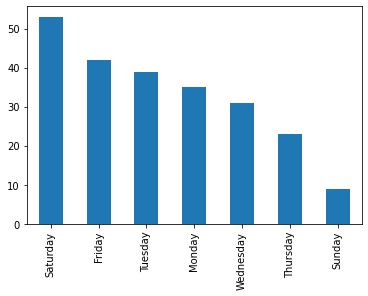

In [20]:
# Check which weekday has the most costumers.
tipAmounts['Day'].value_counts().plot(kind='bar')